#### Upload dataset and Checking types of data, data shape 

In [9]:
import warnings
warnings.filterwarnings("ignore")

In [10]:
# Import required libraries to perform EDA
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline
sns.set(color_codes=True)

import statistics as stats

In [11]:
# Load the dataset without a header and assign column names
df_tweets = pd.read_csv('tweets.csv')

In [12]:
# Check that the dataset was uploaded correctly
df_tweets.head(5)

,id,unix_time,date,flag,user,text
0,0,1467810369,2009-04-06 22:19:45,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,1,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,2,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,3,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,4,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [13]:
# Check the shape of the dataset
df_tweets.shape

(1600000, 6)

In [14]:
# Checking the types of data
df_tweets.dtypes

id            int64
unix_time     int64
date         object
flag         object
user         object
text         object
dtype: object

In [15]:
# Convert the 'Date' from string to datetime
df_tweets['date'] = pd.to_datetime(df_tweets['date'])

In [16]:
# Checking the types of data
df_tweets.dtypes

id                    int64
unix_time             int64
date         datetime64[ns]
flag                 object
user                 object
text                 object
dtype: object

In [17]:
# Extract year, month, day, hour, minute, and second into different columns
df_tweets['year'] = df_tweets['date'].dt.year
df_tweets['month'] = df_tweets['date'].dt.month
df_tweets['day'] = df_tweets['date'].dt.day
df_tweets['hour'] = df_tweets['date'].dt.hour
df_tweets['minute'] = df_tweets['date'].dt.minute
df_tweets['second'] = df_tweets['date'].dt.second

In [18]:
# Check that the dataset was updated correctly
df_tweets.head(5)

,id,unix_time,date,flag,user,text,year,month,day,hour,minute,second
0,0,1467810369,2009-04-06 22:19:45,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",2009,4,6,22,19,45
1,1,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,2009,4,6,22,19,49
2,2,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,2009,4,6,22,19,53
3,3,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,2009,4,6,22,19,57
4,4,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",2009,4,6,22,19,57


#### Check Unique Values for all Columns

In [19]:
# Print total of unique values 
df_tweets["user"].nunique()

# The result is the same one as we got in the SQL analysis

659775

In [20]:
# Print total of unique values 
df_tweets["id"].nunique()

1600000

In [21]:
# Print total of unique values 
df_tweets["text"].nunique()

1581466

The total rows of the dataset are 1,6000,000 but the total of unique values in the column text is 1,581,466. It looks like there might be duplicated rows or null values. We will analyse this later.

In [22]:
# Print unique values 
df_tweets["year"].unique()

array([2009])

In [23]:
# Print unique values
df_tweets["month"].unique()

array([4, 5, 6])

In [24]:
# Print unique values
df_tweets["day"].unique()

array([ 6,  7, 17, 18, 19, 20, 21,  1,  2,  3,  4,  9, 10, 11, 13, 14, 16,
       22, 23, 25, 26, 27, 28, 29, 30, 31,  5, 15, 24])

In [25]:
# Print unique values
df_tweets["hour"].unique()

array([22, 23,  0,  1,  2,  3,  4,  5,  6,  7,  8, 20, 21,  9, 10, 13, 14,
       15, 16, 17, 11, 12, 19, 18])

In [26]:
# Print unique values
df_tweets["minute"].unique()

array([19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38,
       40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 55, 56, 57,
       58,  0,  1,  2,  3,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 24, 29, 34, 39, 54, 59,  4])

In [27]:
# Print unique values
df_tweets["second"].unique()

array([45, 49, 53, 57,  0,  3,  5,  9, 16, 17, 19, 20, 22, 25, 31, 34, 37,
       38, 40, 41, 44, 50, 52, 56,  4,  7, 11, 21, 27, 30, 32, 39, 46,  6,
       13, 23, 24, 26, 47, 55,  8, 15, 28, 35, 43, 54,  2, 10, 14, 18, 29,
       33, 42, 48, 58, 51, 59, 12, 36,  1])

#### Checking duplicate rows and null values

In [28]:
# Check if there are any duplicated rows
duplicate_tweets = df_tweets[df_tweets.duplicated()]
print ("number of duplicate rows: ", duplicate_tweets.shape)

# There are no duplicate rows

number of duplicate rows:  (0, 12)


In [29]:
# Check number of rows
df_tweets.count()

id           1600000
unix_time    1600000
date         1600000
flag         1600000
user         1600000
text         1600000
year         1600000
month        1600000
day          1600000
hour         1600000
minute       1600000
second       1600000
dtype: int64

In [30]:
# Finding the null values
print(df_tweets.isnull().sum())

# There are no null values either

id           0
unix_time    0
date         0
flag         0
user         0
text         0
year         0
month        0
day          0
hour         0
minute       0
second       0
dtype: int64


We can see that there are no duplicated rows or null values. However, as noted earlier, there are 1,600,000 rows, but only 1,581,466 unique values in the 'text' column. Let's delve deeper into the 'text' column for analysis.

In [31]:
# Finding the null values in the 'text' column
print(df_tweets['text'].isnull().sum())

0


In [32]:
# Check for duplicated rows in the 'text' column
duplicate_text = df_tweets[df_tweets.duplicated(subset=['text'])]
print("Number of duplicate rows in the 'text' column:", duplicate_text.shape[0])


Number of duplicate rows in the 'text' column: 18534


There are 18,534 duplicated rows in the text column. One potential reason could be that the user posted the same tweet twice at different times, or that two users tweeted the same content (for example, a hashtag only or a single word).

We decide to keep them as they only represent 1,125% of the dataset (18,534 / 1,600,000)

### Preprocessing of the text for Advanced Data Analytics

#### Sentence Tokenization

In [37]:
# Loading NLTK
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Clara\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [38]:
# We are tokenizing in sentences each review
from nltk.tokenize import sent_tokenize

tokenized_tweets = df_tweets['text'].apply(sent_tokenize)

print(tokenized_tweets)

0          [@switchfoot http://twitpic.com/2y1zl - Awww, ...
1          [is upset that he can't update his Facebook by...
2          [@Kenichan I dived many times for the ball., M...
3           [my whole body feels itchy and like its on fire]
4          [@nationwideclass no, it's not behaving at all...
                                 ...                        
1599995    [Just woke up., Having no school is the best f...
1599996    [TheWDB.com - Very cool to hear old Walt inter...
1599997    [Are you ready for your MoJo Makeover?, Ask me...
1599998    [Happy 38th Birthday to my boo of alll time!!!...
1599999    [happy #charitytuesday @theNSPCC @SparksCharit...
Name: text, Length: 1600000, dtype: object


In [41]:
# We are tokenizing in words all reviews
from nltk.tokenize import word_tokenize

all_tweets = '.'.join(df_tweets['text'].astype(str))

tokenized_word_tweets = word_tokenize(all_tweets)

print(tokenized_word_tweets)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



#### Sentence Distribution

In [42]:
from nltk.probability import FreqDist

# Calculate the frequency distribution
freq_dist = FreqDist(tokenized_word_tweets)

# Display the frequency distribution
print(freq_dist)

<FreqDist with 971917 samples and 26821960 outcomes>


In [43]:
# Display the most common words
freq_dist.most_common(50)

[('.', 1419612),
 ('!', 917950),
 ('@', 798682),
 ('I', 575588),
 ('to', 557176),
 ('the', 487339),
 (',', 484452),
 ('a', 366863),
 ('and', 280327),
 ('my', 274919),
 ('i', 272053),
 ('you', 267630),
 ('it', 257395),
 ('?', 247562),
 ('for', 211591),
 ('...', 209644),
 ('in', 205600),
 ('is', 205534),
 ('of', 180433),
 ("'s", 179140),
 ("n't", 173542),
 (';', 166822),
 ('..', 162695),
 ('on', 158811),
 ('me', 154006),
 ('that', 146996),
 ('&', 146413),
 ('have', 140612),
 ("'m", 130694),
 (':', 128973),
 ('so', 127634),
 ('but', 112809),
 ('with', 112093),
 ('be', 110250),
 ('was', 105269),
 ('do', 105214),
 ('at', 101395),
 ('not', 94693),
 ('just', 87483),
 ('up', 84083),
 ('this', 81932),
 ('now', 80882),
 ('out', 78498),
 ('get', 77427),
 ('day', 77008),
 ('are', 76968),
 ('like', 75884),
 ('all', 74331),
 ('quot', 72107),
 ('-', 69977)]

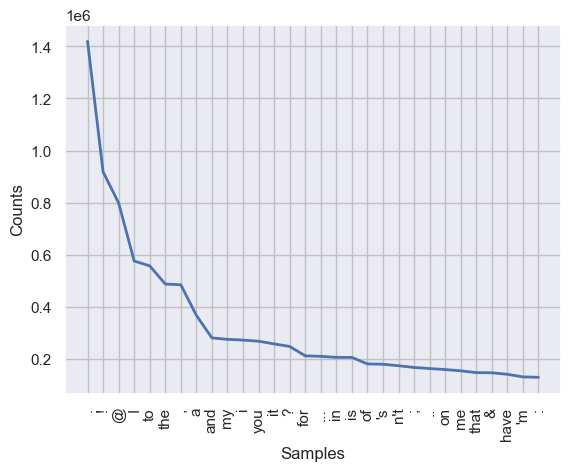

In [44]:
# Frequency Distribution Plot
import matplotlib.pyplot as plt

freq_dist.plot(30, cumulative = False)
plt.show()

In [45]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Clara\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [46]:
# We need to identify and display common English words that will be removed to reduce noise in out dataset.
from nltk.corpus import stopwords

# Load the stop words
stop_words = set(stopwords.words("english"))

# Display the stop words
print(stop_words)

{"wasn't", 'just', 'o', 'both', 'again', 'weren', 'for', "it's", "hasn't", 'wouldn', "mightn't", 'in', 'further', 'no', 'his', "you'll", 'those', "isn't", 'isn', 'themselves', 'yourself', 'but', 'herself', 'on', 'under', 'aren', 'i', 'were', 'over', 'you', 'when', 'm', "that'll", 'then', "couldn't", "should've", 'where', "shouldn't", 'are', 'did', "wouldn't", 'ours', 'our', 'how', 'be', 'out', 'itself', 'hers', 'was', 'up', 'd', 'their', 'here', 'below', "hadn't", 'to', 'theirs', 'these', 'some', 'hasn', 'now', 'through', 'until', 'very', 'she', 'can', 'll', 'needn', 'who', 'why', "didn't", 'about', "doesn't", 'has', 'between', 'from', 'not', 'haven', 'few', 'that', 'only', 'couldn', "you've", 'doing', 'because', 'having', 'most', 'and', 'of', 'by', 'before', 'so', 'will', 'hadn', 'which', "won't", 'more', 'such', 'during', "needn't", 'this', 'my', "you're", 'is', "shan't", 'nor', 'does', 'down', 'if', 's', 'each', 'mightn', 'above', 'any', 'it', 'against', 'the', 'there', 'her', "have

We get rid of this word because instead of bringing value, they bring noise. We focus on more important one.

#### Removing Stop Words

In [48]:
# Initialise an array
filtered_word = []

# for loop for the tokenize sentences
for w in tokenized_word_tweets:
    if w not in stop_words:
        filtered_word.append(w)

# Display the tokenize and filtered sentences
print("Tokenized Sentence (25 rows):", tokenized_word_tweets[:25])
print('\n')
print("Filtered Sentence (25 rows):", filtered_word[:25])


Tokenized Sentence (25 rows): ['@', 'switchfoot', 'http', ':', '//twitpic.com/2y1zl', '-', 'Awww', ',', 'that', "'s", 'a', 'bummer', '.', 'You', 'shoulda', 'got', 'David', 'Carr', 'of', 'Third', 'Day', 'to', 'do', 'it', '.']


Filtered Sentence (25 rows): ['@', 'switchfoot', 'http', ':', '//twitpic.com/2y1zl', '-', 'Awww', ',', "'s", 'bummer', '.', 'You', 'shoulda', 'got', 'David', 'Carr', 'Third', 'Day', '.', ';', 'D.is', 'upset', 'ca', "n't", 'update']


#### Steming
It is used for chopping words. Por ejemplo, si tenemos en el texto interest, interesting y interested, van a aparecer por separado. Queremos que todos se queden con la misma raiz 'interest' para que cuente 3 veces.

In [49]:
# Stemming
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

# Create an initialise an object ps by calling a method PorterStemmer()
ps = PorterStemmer()

# Initialise an array 'stemmed_words'
stemmed_word = []

# Store all the words into an array 'stemmed_words'
for w in filtered_word:
    stemmed_word.append(ps.stem(w))

# Display the stemmed_words
print("Filtered Sentence (25 words):",filtered_word[:25])
print('\n')
print("Stemmed Sentence (25 words):",stemmed_word[:25])

Filtered Sentence (25 words): ['@', 'switchfoot', 'http', ':', '//twitpic.com/2y1zl', '-', 'Awww', ',', "'s", 'bummer', '.', 'You', 'shoulda', 'got', 'David', 'Carr', 'Third', 'Day', '.', ';', 'D.is', 'upset', 'ca', "n't", 'update']


Stemmed Sentence (25 words): ['@', 'switchfoot', 'http', ':', '//twitpic.com/2y1zl', '-', 'awww', ',', "'s", 'bummer', '.', 'you', 'shoulda', 'got', 'david', 'carr', 'third', 'day', '.', ';', 'd.i', 'upset', 'ca', "n't", 'updat']


In [50]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Clara\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [51]:
# Lexicon Normalization
# Performing Lemmatization

from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

# Create an initialise an object 'lem' by calling a method WordNetLemmatizer()
lem = WordNetLemmatizer()

# Initialise an array 'stemmed_words'
lemmatized_word = []

# Store all the words into an array 'stemmed_words'
for w in filtered_word:
    lemmatized_word.append(lem.lemmatize(w, "v")) # The POS tag "v" indicates that the word should be lemmatized as a verb.

print("Lemmatized Sentence (25 words):",lemmatized_word[:25])
print('\n')
print("Stemmed Sentence (25 words):",stemmed_word[:25])

Lemmatized Sentence (25 words): ['@', 'switchfoot', 'http', ':', '//twitpic.com/2y1zl', '-', 'Awww', ',', "'s", 'bummer', '.', 'You', 'shoulda', 'get', 'David', 'Carr', 'Third', 'Day', '.', ';', 'D.is', 'upset', 'ca', "n't", 'update']


Stemmed Sentence (25 words): ['@', 'switchfoot', 'http', ':', '//twitpic.com/2y1zl', '-', 'awww', ',', "'s", 'bummer', '.', 'you', 'shoulda', 'got', 'david', 'carr', 'third', 'day', '.', ';', 'd.i', 'upset', 'ca', "n't", 'updat']


In [52]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Clara\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

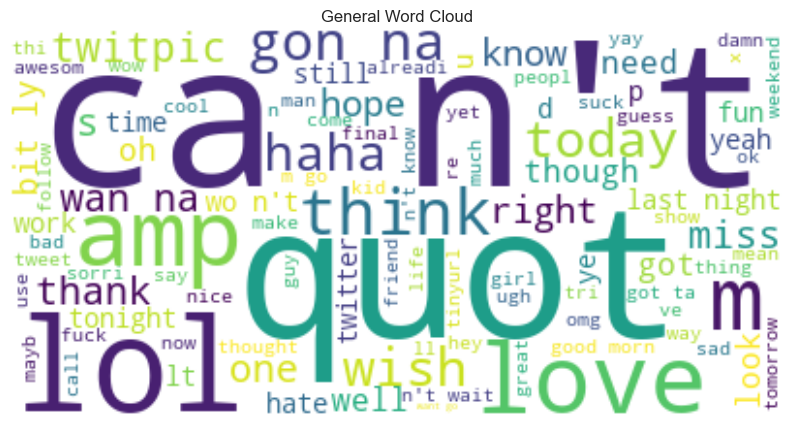

In [56]:
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all reviews into a single text
all_tweets = ' '.join(stemmed_word)

# Create a word cloud for the combined text
wordcloud_all = WordCloud(background_color='white', max_words=100).generate(all_tweets)

# Display the word cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_all, interpolation='bilinear')
plt.axis('off')
plt.title('General Word Cloud')
plt.show()

### Sentiment Analysis

We are reprocessing a dataset of tweets by doing again:

- Preprocessing the text: Cleaning, tokenizing, removing stop words, and lemmatizing each tweet individually.
- Vectorizing the text: Converting each processed tweet into numerical vectors using TF-IDF, while keeping each tweet as a separate row.
- Analyzing sentiment: Calculating sentiment scores for each tweet.
- Combining data: Merging the original text, processed text, sentiment scores, and TF-IDF vectors into a single dataset, maintaining the original row structure and temporal sequence.

The previous approach combined all words into a single bag for the word cloud, losing the structure and sequence of the data. Now, with this new reprocessing, we ensure that each tweet remains in its respective row, preserving the time series order for accurate forecasting and analysis.

In [3]:
!pip install vaderSentiment

  Obtaining dependency information for vaderSentiment from https://files.pythonhosted.org/packages/76/fc/310e16254683c1ed35eeb97386986d6c00bc29df17ce280aed64d55537e9/vaderSentiment-3.3.2-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
   ----------------------------------- ---- 112.6/126.0 kB 2.2 MB/s eta 0:00:01
   ---------------------------------------- 126.0/126.0 kB 2.5 MB/s eta 0:00:00


In [4]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [5]:
# Preprocessing functions
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [6]:
def preprocess(text):
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalnum() and word not in stop_words]
    return ' '.join(tokens)

In [34]:
# Apply preprocessing to each tweet
df_tweets['processed_text'] = df_tweets['text'].apply(preprocess)

In [36]:
# Sentiment Analysis on Raw and Processed Text
sia = SentimentIntensityAnalyzer()
df_tweets['raw_sentiment'] = df_tweets['text'].apply(lambda x: sia.polarity_scores(x)['compound'])
df_tweets['raw_sentiment_classification'] = df_tweets['raw_sentiment'].apply(lambda x: 'Positive' if x >= 0.5 else 'Negative')
df_tweets['processed_sentiment'] = df_tweets['processed_text'].apply(lambda x: sia.polarity_scores(x)['compound'])
df_tweets['processed_sentiment_classification'] = df_tweets['processed_sentiment'].apply(lambda x: 'Positive' if x >= 0.5 else 'Negative')

In [39]:
# Combine relevant columns
final_df = df_tweets[['date', 'text', 'processed_text', 'raw_sentiment', 'raw_sentiment_classification', 'processed_sentiment', 'processed_sentiment_classification']]

# Display the DataFrame
final_df.head(5)

,date,text,processed_text,raw_sentiment,raw_sentiment_classification,processed_sentiment,processed_sentiment_classification
0,2009-04-06 22:19:45,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot http awww bummer shoulda got david ...,-0.0173,Negative,-0.3818,Negative
1,2009-04-06 22:19:49,is upset that he can't update his Facebook by ...,upset ca update facebook texting might cry res...,-0.7500,Negative,-0.7269,Negative
2,2009-04-06 22:19:53,@Kenichan I dived many times for the ball. Man...,kenichan dived many time ball managed save 50 ...,0.4939,Negative,0.4939,Negative
3,2009-04-06 22:19:57,my whole body feels itchy and like its on fire,whole body feel itchy like fire,-0.2500,Negative,-0.2500,Negative
4,2009-04-06 22:19:57,"@nationwideclass no, it's not behaving at all....",nationwideclass behaving mad ca see,-0.4939,Negative,-0.4939,Negative


### Check differences between raw sentiment analysis and preprocessed sentiment analysis

We want to check if there are differences between the two of them, to evaluate which one should we use

In [41]:
# Calculate differences in sentiment scores
final_df['sentiment_difference'] = final_df['raw_sentiment'] - final_df['processed_sentiment']

In [42]:
# Count classification differences
classification_diff_count = (final_df['raw_sentiment_classification'] != final_df['processed_sentiment_classification']).sum()

In [43]:
# Display summary statistics
print("Summary Statistics:")
print(final_df[['raw_sentiment', 'processed_sentiment', 'sentiment_difference']].describe())


Summary Statistics:
       raw_sentiment  processed_sentiment  sentiment_difference
count   1.600000e+06         1.600000e+06          1.600000e+06
mean    1.443069e-01         1.658794e-01         -2.157244e-02
std     4.610812e-01         4.341484e-01          2.206797e-01
min    -9.985000e-01        -9.985000e-01         -1.852800e+00
25%    -1.007000e-01         0.000000e+00          0.000000e+00
50%     0.000000e+00         2.580000e-02          0.000000e+00
75%     5.411000e-01         5.165000e-01          0.000000e+00
max     9.987000e-01         9.987000e-01          1.861200e+00


In [44]:
# Count how many sentiment classifications changed
print(f"Number of different classifications: {classification_diff_count}")

Number of different classifications: 119167


Text(0, 0.5, 'Frequency')

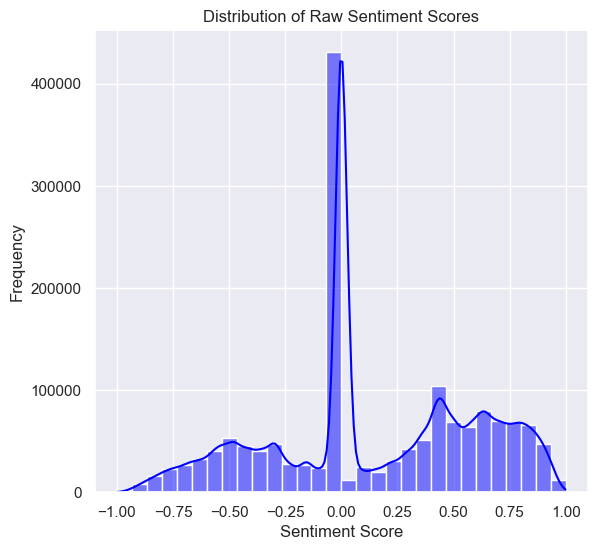

In [46]:
# Visualize the distribution of sentiment scores
plt.figure(figsize=(14, 6))

# Distribution of raw sentiment scores
plt.subplot(1, 2, 1)
sns.histplot(final_df['raw_sentiment'], kde=True, color='blue', bins=30)
plt.title('Distribution of Raw Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')

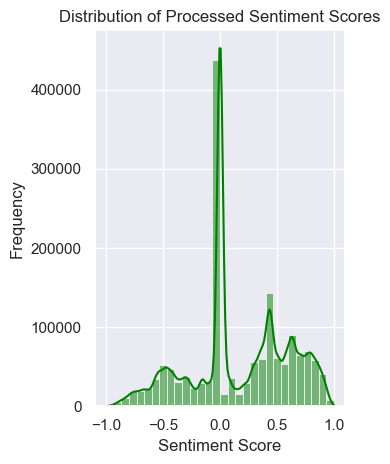

In [47]:
# Distribution of processed sentiment scores
plt.subplot(1, 2, 2)
sns.histplot(final_df['processed_sentiment'], kde=True, color='green', bins=30)
plt.title('Distribution of Processed Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

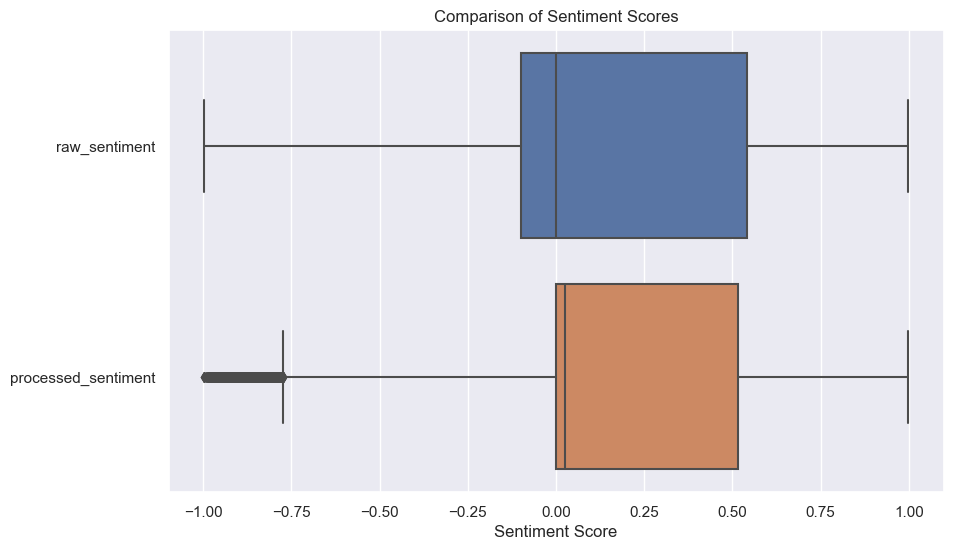

In [48]:
# Boxplot to compare sentiment scores
plt.figure(figsize=(10, 6))
sns.boxplot(data=final_df[['raw_sentiment', 'processed_sentiment']], orient='h')
plt.title('Comparison of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.show()

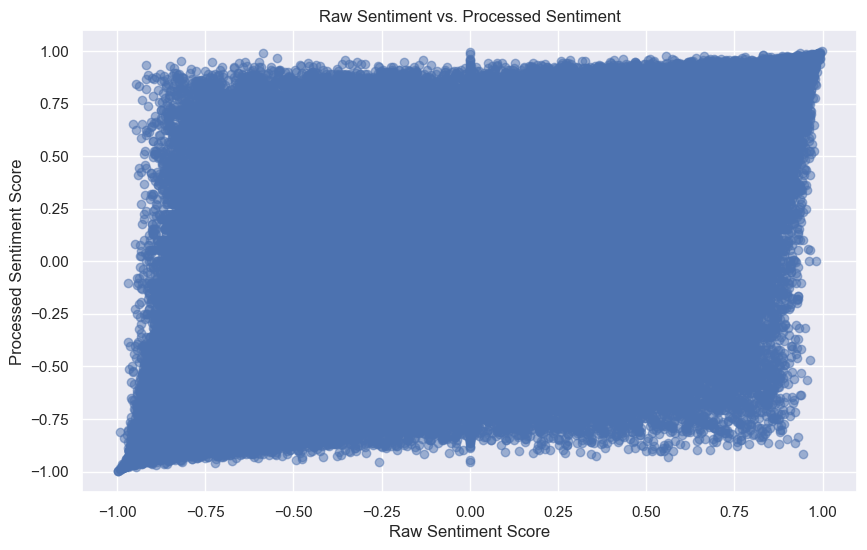

In [49]:
# Scatter plot to visualize sentiment differences
plt.figure(figsize=(10, 6))
plt.scatter(final_df['raw_sentiment'], final_df['processed_sentiment'], alpha=0.5)
plt.title('Raw Sentiment vs. Processed Sentiment')
plt.xlabel('Raw Sentiment Score')
plt.ylabel('Processed Sentiment Score')
plt.show()

In [50]:
# Display the DataFrame
final_df.head(5)

,date,text,processed_text,raw_sentiment,raw_sentiment_classification,processed_sentiment,processed_sentiment_classification,sentiment_difference
0,2009-04-06 22:19:45,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot http awww bummer shoulda got david ...,-0.0173,Negative,-0.3818,Negative,0.3645
1,2009-04-06 22:19:49,is upset that he can't update his Facebook by ...,upset ca update facebook texting might cry res...,-0.7500,Negative,-0.7269,Negative,-0.0231
2,2009-04-06 22:19:53,@Kenichan I dived many times for the ball. Man...,kenichan dived many time ball managed save 50 ...,0.4939,Negative,0.4939,Negative,0.0000
3,2009-04-06 22:19:57,my whole body feels itchy and like its on fire,whole body feel itchy like fire,-0.2500,Negative,-0.2500,Negative,0.0000
4,2009-04-06 22:19:57,"@nationwideclass no, it's not behaving at all....",nationwideclass behaving mad ca see,-0.4939,Negative,-0.4939,Negative,0.0000


In [51]:
# Save to CSV for further time series analysis
final_df.to_csv('processed_tweets_with_sentiment.csv')